In [145]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

## Get data of circles

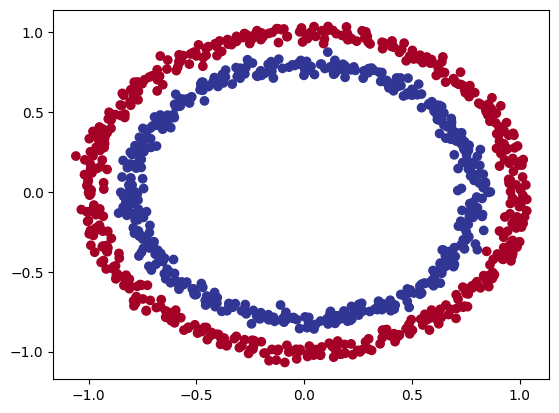

In [146]:
n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Device agnostic code

In [147]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Current device", device)

Current device cpu


## numpy -> tensors
## Splitting data

In [148]:
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building the model

In [149]:
from torch import nn
class CircleClassV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=16)
    self.layer_2 = nn.Linear(in_features=16, out_features=16)
    self.layer_3 = nn.Linear(in_features=16, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_0 = CircleClassV0().to(device)
model_0



CircleClassV0(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)

In [150]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.04)

X_train , y_train = X_train.to(device), y_train.to(device)
X_test , y_test = X_test.to(device), y_test.to(device)

In [151]:
torch.manual_seed(42)
epochs = 8000
losses=[]
for epoch in range(epochs):
  ### Training
  model_0.train()

  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  # Logits are a fundamental concept in machine learning, providing the raw predictions generated by a model before transforming them into probabilities.

  # BCEWithLogitsLoss takes in logits as first input
  loss = loss_fn(y_logits, y_train)

  # to zero the gradients so that it can start from fresh for every epoch
  optimizer.zero_grad()

  # backpropagation
  loss.backward()

  # gradient descent
  optimizer.step()

  losses.append(loss.item())
  ### Test loop
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)

    # Print what is happening
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.4f} | Test Loss: {test_loss:.4f}")

Epoch: 0 | Loss: 0.6975 | Test Loss: 0.6981
Epoch: 100 | Loss: 0.6918 | Test Loss: 0.6932
Epoch: 200 | Loss: 0.6905 | Test Loss: 0.6920
Epoch: 300 | Loss: 0.6893 | Test Loss: 0.6909
Epoch: 400 | Loss: 0.6880 | Test Loss: 0.6898
Epoch: 500 | Loss: 0.6866 | Test Loss: 0.6888
Epoch: 600 | Loss: 0.6851 | Test Loss: 0.6876
Epoch: 700 | Loss: 0.6835 | Test Loss: 0.6864
Epoch: 800 | Loss: 0.6817 | Test Loss: 0.6851
Epoch: 900 | Loss: 0.6796 | Test Loss: 0.6836
Epoch: 1000 | Loss: 0.6773 | Test Loss: 0.6819
Epoch: 1100 | Loss: 0.6747 | Test Loss: 0.6800
Epoch: 1200 | Loss: 0.6717 | Test Loss: 0.6777
Epoch: 1300 | Loss: 0.6682 | Test Loss: 0.6750
Epoch: 1400 | Loss: 0.6642 | Test Loss: 0.6718
Epoch: 1500 | Loss: 0.6593 | Test Loss: 0.6678
Epoch: 1600 | Loss: 0.6535 | Test Loss: 0.6630
Epoch: 1700 | Loss: 0.6458 | Test Loss: 0.6567
Epoch: 1800 | Loss: 0.6369 | Test Loss: 0.6494
Epoch: 1900 | Loss: 0.6259 | Test Loss: 0.6402
Epoch: 2000 | Loss: 0.6126 | Test Loss: 0.6289
Epoch: 2100 | Loss: 0.596

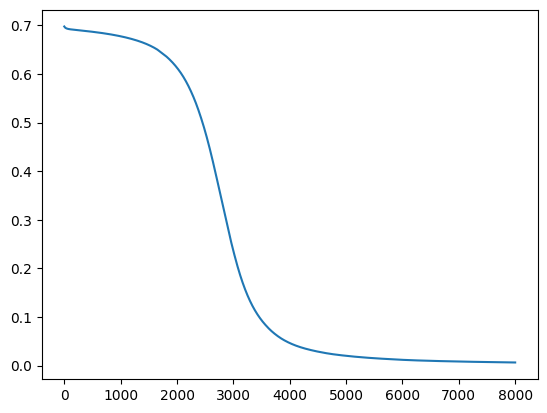

In [152]:
plt.plot(losses)

## Visualize

In [153]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


In [154]:
model_0.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_0(X_test))).squeeze()

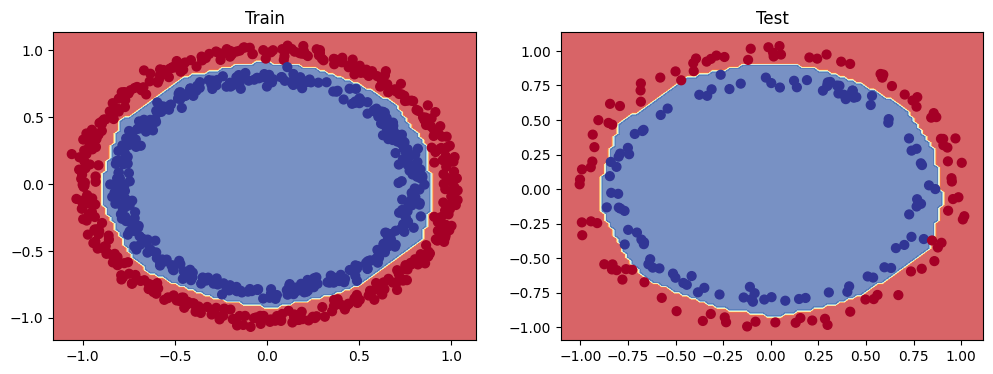

In [155]:
plt.figure(figsize=(12, 4))

# plt.subplot(figure_has_how_many_rows, figure_has_how_many_cols, which_plot_is_this)
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)